The goal of this project is to predict whether an individual suffers from cardiovascular heart disease using some predictors and to find the main risk factors for a cardiovascular heart disease. This information helps to improve preventive medical checkups and to react quicker in emergencies.

Goal: Predict whether a patient should be diagnosed with Heart Disease.

1 = patient diagnosed with Heart Disease
0 = patient not diagnosed with Heart Disease


In [216]:
pip install dmba

In [217]:
import pandas as pd
import numpy as np

### Utility
import math
import warnings
import string

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


# Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from dmba import plotDecisionTree, classificationSummary, regressionSummary


#LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

#RND Forest
from sklearn.ensemble import RandomForestClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Classifier
from sklearn import svm
from sklearn.svm import LinearSVC

# Seaborn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

warnings.filterwarnings("ignore")

In [218]:
df=pd.read_csv("/content/cardio_train.csv",delimiter=';')

In [219]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [221]:
num_missing_values = df.isna().sum().sum()
num_missing_values

0

In [222]:
#dropping ID columns
df.drop(['id'], axis=1,inplace=True)

In [223]:
duplicate_sum = df.duplicated().sum()
duplicate_sum

24

In [224]:
# dropping the duplicates

df.drop_duplicates(keep = 'first', inplace = True)

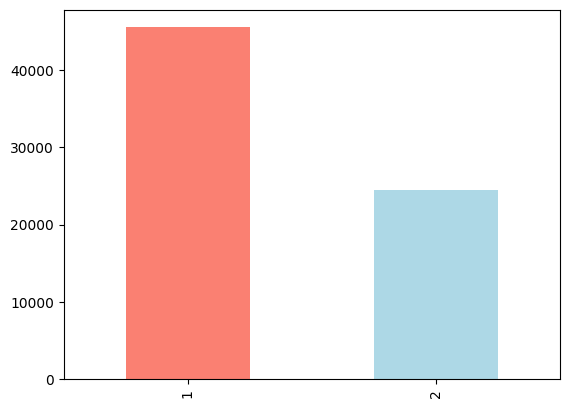

In [225]:
# Get the count of each gender
gender_count = df['gender'].value_counts()
df.gender.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64


<Axes: xlabel='gender'>

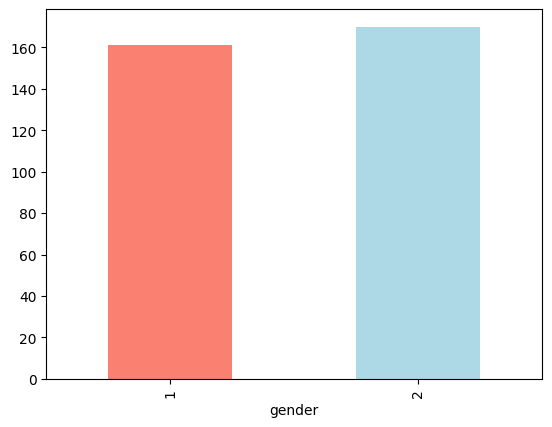

In [226]:
# Get the count of each gender
avg_height = df.groupby('gender')['height'].mean()
print(avg_height)
avg_height.plot(kind="bar", color=["salmon", "lightblue"])


gender
1    1161
2    2603
Name: alco, dtype: int64


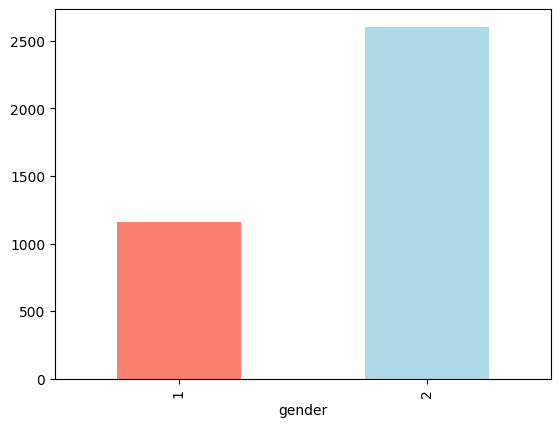

In [227]:
alcohol=df.groupby('gender')['alco'].sum()
print(alcohol)
ax=alcohol.plot(kind="bar", color=["salmon", "lightblue"])


In [228]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#Observations


- 'Age' column has to be recalculated it has a minimum values of 10789' which is unrealistic therefore they represents a missing/incorrect value.
- 'Weight' column have unrealistic min/max values.
- Systolic blood pressure "ap_hi" and Diastolic blood pressure "ap_lo" cannot be negative
- If ap_hi and ap_lo are more than 180 and 120 mmHg respectively then it is an hypertensive crisis, which is an emergency case. Therefore max values are not realistic.

In [229]:
df = df[ (df['ap_lo'] >= 0) & (df['ap_hi'] >= 0) ]  #considering positive values remove negative values
df = df[ (df['ap_lo'] <= 120) & (df['ap_hi'] <= 180) ]  #remove fishy data points
df = df[ (df['ap_lo'] < df['ap_hi']) ]  #remove systolic higher than diastolic

Converting age from days to years

In [230]:
df['age']=df['age'].apply(lambda x: x/365)

#calculating a new feature Pulse

In [231]:
def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])

df['pulse'] = df.apply(pulse, axis=1)

<Axes: >

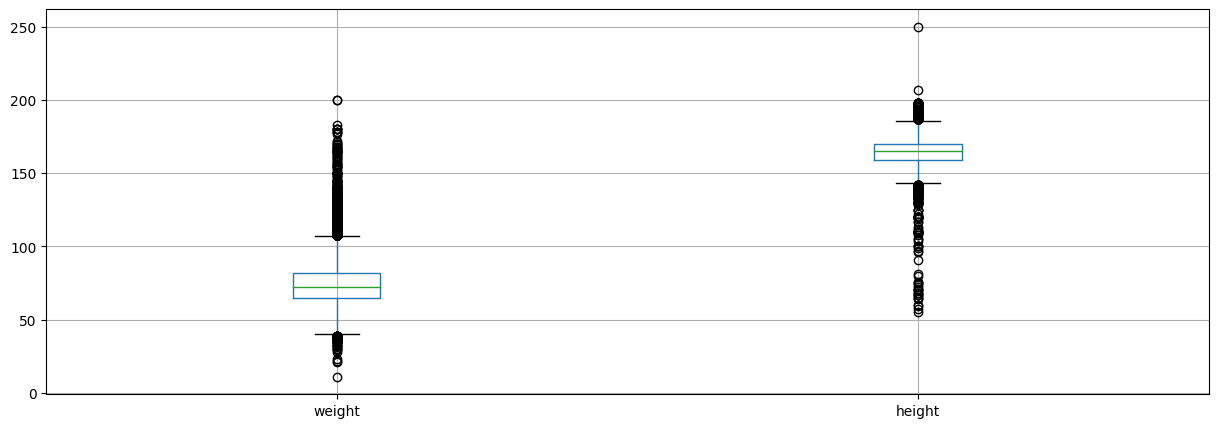

In [232]:
plt.figure(figsize=(15,5))
df.boxplot(['weight','height'])

We can observe lot's of outliers ( Points below Lower Fence and Above Upper Fence )

Outliers = Q1 – 1.5 IQR

Outliers = Q3 + 1.5 IQR

IQR = Q3- Q1

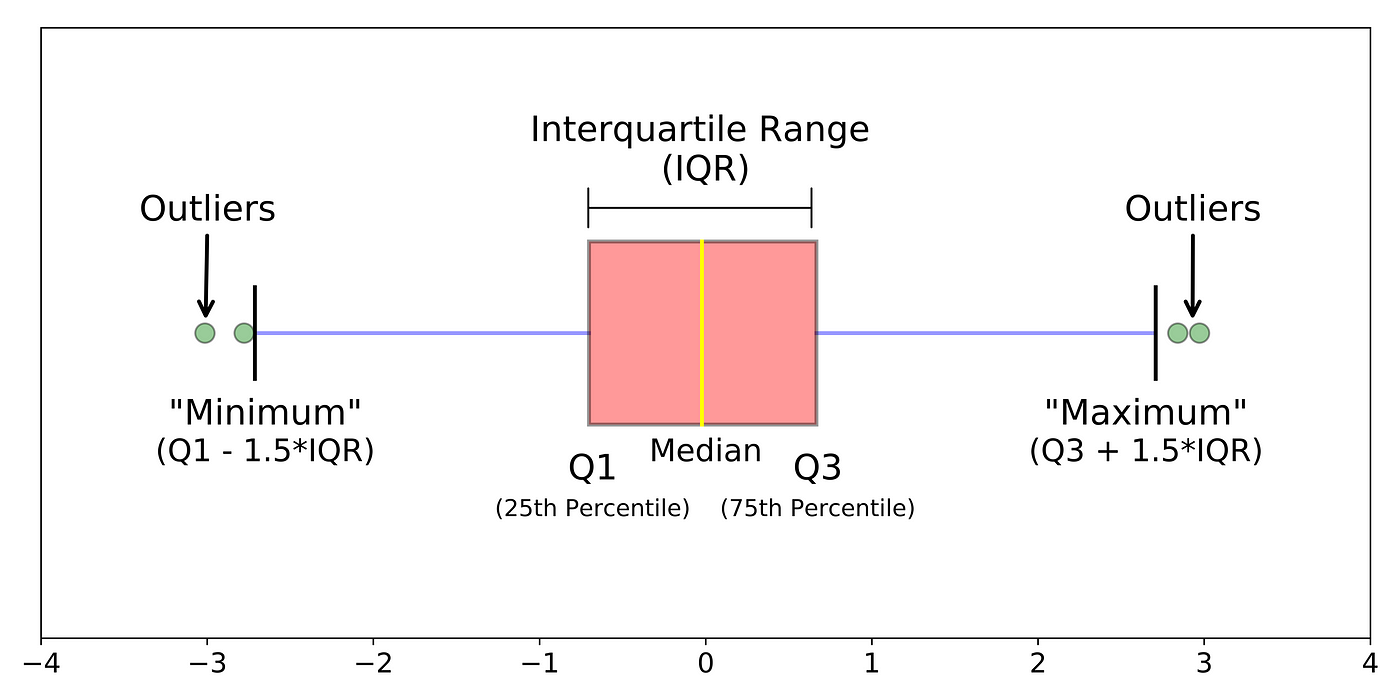

In [233]:
def outliers(df_cardio, drop = False):
    for each_feature in df_cardio.columns:
        feature_data = df_cardio[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range

        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 505
For the feature weight, No of Outliers is 1714


Natural log of a value reduces the variation caused by extreme values

In [234]:
outlier_free_df = df.copy()
outlier_free_df[['height', 'weight']] = np.log(outlier_free_df[['height', 'weight']])
outliers(outlier_free_df[['height', 'weight']])

For the feature height, No of Outliers is 475
For the feature weight, No of Outliers is 1117


In [235]:
outlier_free_df = outlier_free_df[(outlier_free_df['weight'] > outlier_free_df['weight'].quantile(0.005)) & (outlier_free_df['weight'] < outlier_free_df['weight'].quantile(0.995))]
outline_free_df = outlier_free_df[(outlier_free_df['height'] > outlier_free_df['height'].quantile(0.005)) & (outlier_free_df['height'] < outlier_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 326


In [236]:
outlier_free_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse
0,50.391781,2,5.123964,4.127134,110,80,1,1,0,0,1,0,30.0
1,55.419178,1,5.049856,4.442651,140,90,3,1,0,0,1,1,50.0
2,51.663014,1,5.105945,4.158883,130,70,3,1,0,0,0,1,60.0
3,48.282192,2,5.129899,4.406719,150,100,1,1,0,0,1,1,50.0
4,47.873973,1,5.049856,4.025352,100,60,1,1,0,0,0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.736986,1,5.105945,4.382027,150,80,1,1,0,0,1,1,70.0
69995,52.712329,2,5.123964,4.330733,120,80,1,1,1,0,1,0,40.0
69997,52.235616,2,5.209486,4.653960,180,90,3,1,0,1,0,1,90.0
69998,61.454795,1,5.093750,4.276666,135,80,1,2,0,0,0,1,55.0


# Feature Selction using correlation matrix

<Axes: >

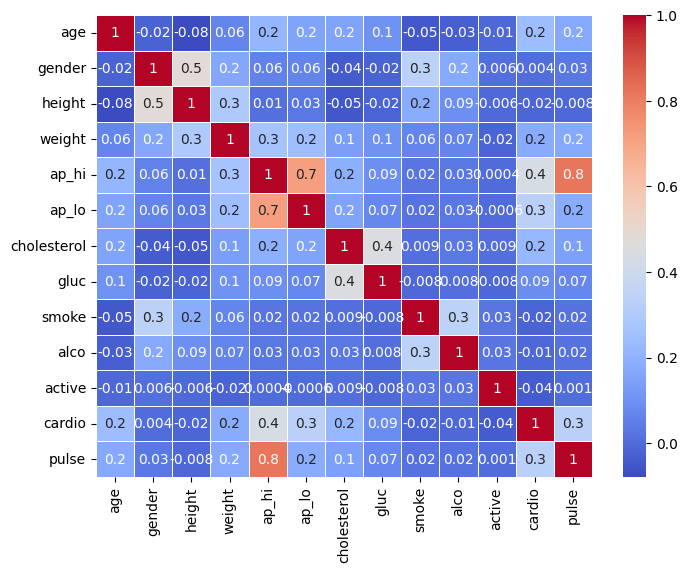

In [237]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(outlier_free_df.corr(), annot = True,cmap= 'coolwarm',ax=ax, fmt='.1g', linewidths=.5)

- ap_hi has the maximum correlation with Target Value

- pulse and ap_lo also have some coorelation with cardio

- Features like gender, height, smoke, alco, active have quite low amount of correlation with target feature

In [260]:
outlier_free_df=outlier_free_df.drop(columns=['gender', 'height', 'smoke', 'alco', 'active'],axis=1)

In [261]:
outlier_free_df

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,pulse
0,50.391781,4.127134,110,80,1,1,0,30.0
1,55.419178,4.442651,140,90,3,1,1,50.0
2,51.663014,4.158883,130,70,3,1,1,60.0
3,48.282192,4.406719,150,100,1,1,1,50.0
4,47.873973,4.025352,100,60,1,1,0,40.0
...,...,...,...,...,...,...,...,...
69994,57.736986,4.382027,150,80,1,1,1,70.0
69995,52.712329,4.330733,120,80,1,1,0,40.0
69997,52.235616,4.653960,180,90,3,1,1,90.0
69998,61.454795,4.276666,135,80,1,2,1,55.0


# converting categorical data to category data type

- gender has 2 categorial values as { 1 : Women, 2 : Male }
- cholesterol has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
- gluc has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
- Remaining Categories are just binary values

In [262]:
categorical_columns=['cholesterol','gluc']
for col in categorical_columns:
  outlier_free_df[col] = outlier_free_df[col].astype('category')


df_cardio=pd.get_dummies(outlier_free_df)

df_cardio

,age,weight,ap_hi,ap_lo,cardio,pulse,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,50.391781,4.127134,110,80,0,30.0,1,0,0,1,0,0
1,55.419178,4.442651,140,90,1,50.0,0,0,1,1,0,0
2,51.663014,4.158883,130,70,1,60.0,0,0,1,1,0,0
3,48.282192,4.406719,150,100,1,50.0,1,0,0,1,0,0
4,47.873973,4.025352,100,60,0,40.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.736986,4.382027,150,80,1,70.0,1,0,0,1,0,0
69995,52.712329,4.330733,120,80,0,40.0,1,0,0,1,0,0
69997,52.235616,4.653960,180,90,1,90.0,0,0,1,1,0,0
69998,61.454795,4.276666,135,80,1,55.0,1,0,0,0,1,0


# Scaling the Dataframe

There are some features having a lot of variations and are measured in different units and scaling will help to scale them down in the standard normal distribution

In [263]:
columns_to_scale=['age','weight','ap_hi','ap_lo']
scaler = StandardScaler()
df_cardio[columns_to_scale]= scaler.fit_transform(df_cardio[columns_to_scale])


In [264]:
df_cardio

,age,weight,ap_hi,ap_lo,cardio,pulse,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,-0.434374,-0.911617,-1.023168,-0.122101,0,30.0,1,0,0,1,0,0
1,0.309463,0.881391,0.852207,0.943058,1,50.0,0,0,1,1,0,0
2,-0.246286,-0.731196,0.227082,-1.187260,1,60.0,0,0,1,1,0,0
3,-0.746502,0.677198,1.477333,2.008217,1,50.0,1,0,0,1,0,0
4,-0.806900,-1.490024,-1.648293,-2.252419,0,40.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.652399,0.536876,1.477333,-0.122101,1,70.0,1,0,0,1,0,0
69995,-0.091033,0.245388,-0.398043,-0.122101,0,40.0,1,0,0,1,0,0
69997,-0.161566,2.082210,3.352708,0.943058,1,90.0,0,0,1,1,0,0
69998,1.202474,-0.061863,0.539645,-0.122101,1,55.0,1,0,0,0,1,0


In [266]:
# dropping less coorelated features
X = df_cardio.drop(['cardio'], axis =1)
Y = df_cardio['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)

#KNN

In [267]:
knn_scores=[]
results = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test)),
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.638770
1    2  0.644438
2    3  0.682439
3    4  0.684657
4    5  0.698802
5    6  0.702647
6    7  0.706886
7    8  0.710681
8    9  0.713884
9   10  0.715856
10  11  0.716891
11  12  0.719454
12  13  0.720538
13  14  0.724629
14  15  0.725713
15  16  0.726551
16  17  0.726453
17  18  0.727734
18  19  0.726403


In [268]:
Y_pred = knn.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10272
           1       0.74      0.69      0.71     10017

    accuracy                           0.73     20289
   macro avg       0.73      0.73      0.73     20289
weighted avg       0.73      0.73      0.73     20289



In [269]:
classificationSummary(y_test,Y_pred)

Confusion Matrix (Accuracy 0.7264)

       Prediction
Actual    0    1
     0 7839 2433
     1 3118 6899


# Decision Tree

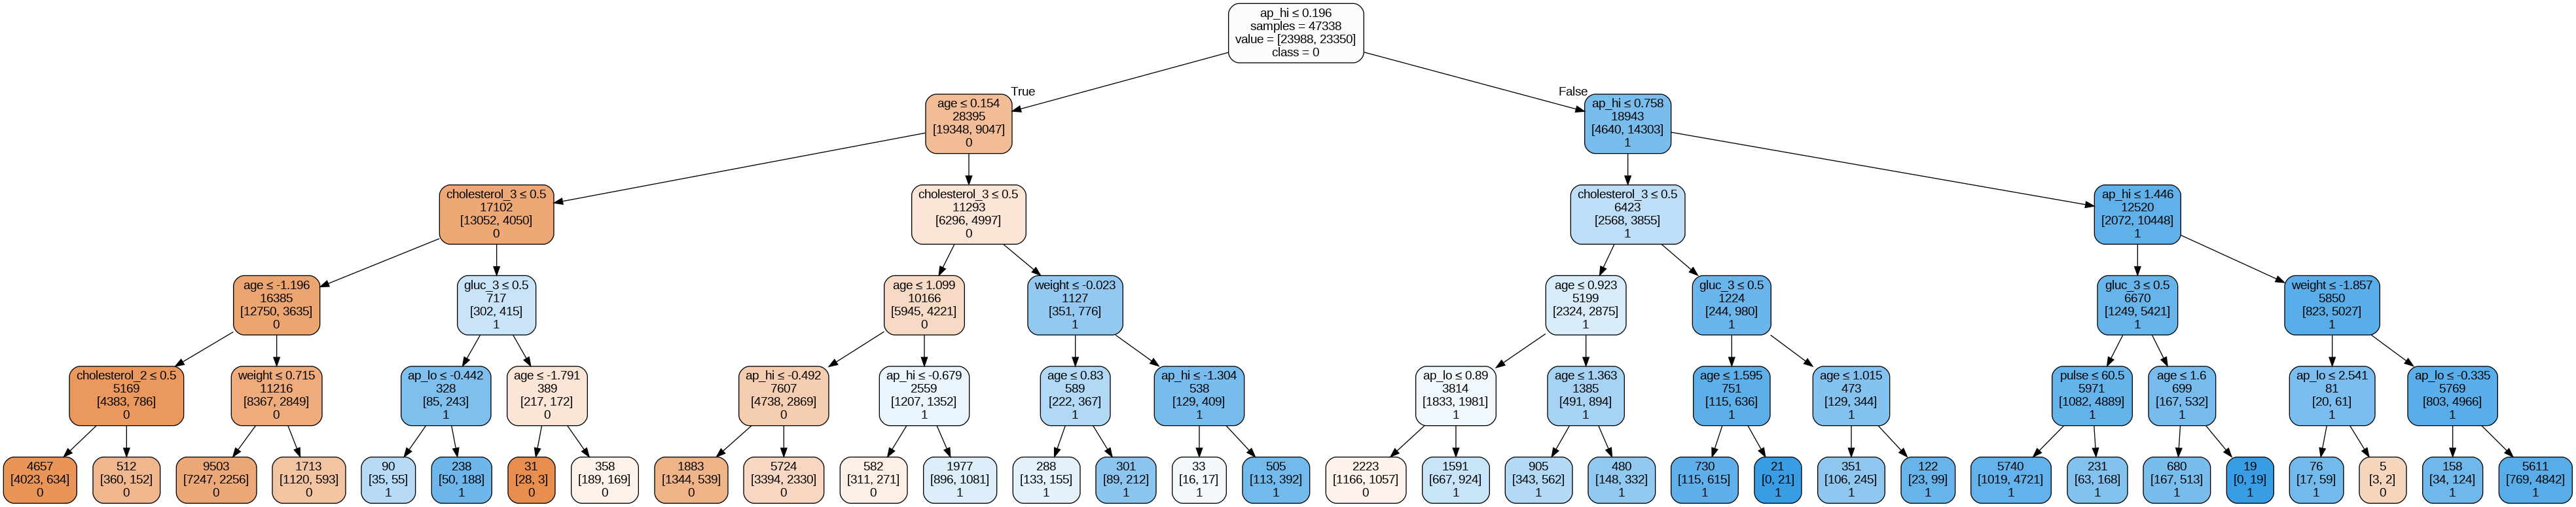

In [270]:
classTree = DecisionTreeClassifier(random_state=42, max_depth=5)
classTree.fit(X_train, y_train)
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

In [271]:

Y_pred_dt = classTree.predict(X_test)

dtree_acc = accuracy_score(y_test, Y_pred_dt)   # accuracy score
cm_dtree = confusion_matrix(y_test, Y_pred_dt) # Confusion matrix
tpr_dtree = cm_dtree[1][1] /(cm_dtree[1][0] + cm_dtree[1][1])
dtree_acc = accuracy_score(y_test, Y_pred_dt)

print("Accuracy",dtree_acc)
print("Sensitivity",tpr_dtree)

print(classification_report(y_test, Y_pred_dt))

classificationSummary(y_test,Y_pred_dt)

Accuracy 0.7356695746463601
Sensitivity 0.6638714185883997
              precision    recall  f1-score   support

           0       0.71      0.81      0.76     10272
           1       0.77      0.66      0.71     10017

    accuracy                           0.74     20289
   macro avg       0.74      0.73      0.73     20289
weighted avg       0.74      0.74      0.73     20289

Confusion Matrix (Accuracy 0.7357)

       Prediction
Actual    0    1
     0 8276 1996
     1 3367 6650


In [276]:
# Five-fold cross-validation of the full decision tree classifier

scores = cross_val_score(classTree, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

Accuracy scores of each fold:  ['0.722', '0.732', '0.729', '0.723', '0.726']


# Logistic regression

In [273]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_lr)   # accuracy score
cm_lr = confusion_matrix(y_test, y_pred_lr) # Confusion matrix
tpr_lr = cm_lr[1][1] /(cm_lr[1][0] + cm_lr[1][1])
lr_acc = accuracy_score(y_test, y_pred_lr)

print('Accuracy ', lr_acc )# accuracy score
print('Sensitivity (TPR) =', tpr_lr)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred_lr))

classificationSummary(y_test,y_pred_lr)

Accuracy  0.7278821036029376
Sensitivity (TPR) = 0.6686632724368573

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10272
           1       0.75      0.67      0.71     10017

    accuracy                           0.73     20289
   macro avg       0.73      0.73      0.73     20289
weighted avg       0.73      0.73      0.73     20289

Confusion Matrix (Accuracy 0.7279)

       Prediction
Actual    0    1
     0 8070 2202
     1 3319 6698


# Random Forest

          feature  importance       std
9          gluc_2    0.003463  0.000995
10         gluc_3    0.003853  0.001123
6   cholesterol_2    0.004346  0.002290
8          gluc_1    0.004753  0.001290
5   cholesterol_1    0.012998  0.011290
7   cholesterol_3    0.015325  0.009557
4           pulse    0.059441  0.044515
3           ap_lo    0.061400  0.046686
2           ap_hi    0.127738  0.070860
1          weight    0.192592  0.011772
0             age    0.514092  0.011919


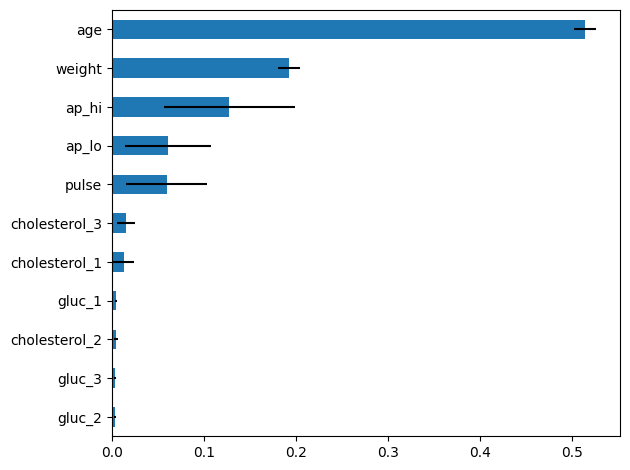

In [274]:

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [275]:

Y_pred_rf = rf.predict(X_test)

rf_tree_acc = accuracy_score(y_test, Y_pred_rf)   # accuracy score
cm_rf_tree = confusion_matrix(y_test, Y_pred_rf) # Confusion matrix
tpr_rf_tree = cm_rf_tree[1][1] /(cm_rf_tree[1][0] + cm_rf_tree[1][1])
rf_tree_acc = accuracy_score(y_test, Y_pred_rf)

print("Accuracy",rf_tree_acc)
print("Sensitivity",tpr_rf_tree)

print(classification_report(y_test, Y_pred_rf))

classificationSummary(y_test,Y_pred_rf)

Accuracy 0.6782000098575582
Sensitivity 0.6855345911949685
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     10272
           1       0.67      0.69      0.68     10017

    accuracy                           0.68     20289
   macro avg       0.68      0.68      0.68     20289
weighted avg       0.68      0.68      0.68     20289

Confusion Matrix (Accuracy 0.6782)

       Prediction
Actual    0    1
     0 6893 3379
     1 3150 6867
